In [1]:
import cv2
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

## Load images dataset

In [7]:
from PIL import Image

DATASET_DIR = "../hnm-images/data/raw/images"

images = []
image_paths = []

# iterate to call images data
for root, _, files in os.walk(DATASET_DIR):
    for filename in files:
        if filename.lower().endswith(".jpg"):
            path = os.path.join(root, filename)
            image = Image.open(path).convert("RGB")
            images.append(image)
            image_paths.append(path)

print(f"Loaded {len(images)} JPG Images")

Loaded 2479 JPG Images


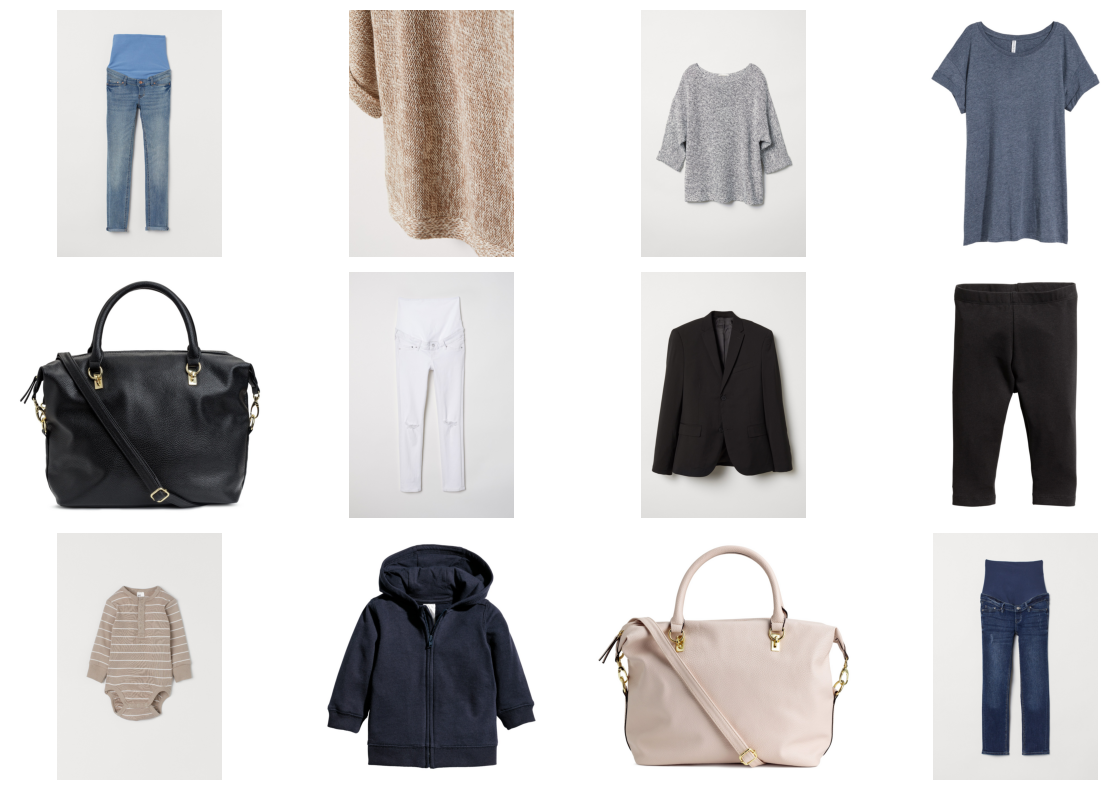

In [26]:
# show multiple images
import matplotlib.pyplot as plt

def show_images(images, cols=4, figsize=(12, 8)):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=figsize)

    for i, img in enumerate(images):
        plt.subplot(rows, cols,  i + 1)
        plt.imshow(img)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Usage
show_images(images[:12], cols=4)

## Load dataset embeddings

In [35]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("../data/fashion-articles.csv")
df.head(7)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
5,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,1,Dusty Light,11,Beige,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
6,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."


In [31]:
df["detail_desc"]

0                   Jersey top with narrow shoulder straps.
1                   Jersey top with narrow shoulder straps.
2                   Jersey top with narrow shoulder straps.
3         Microfibre T-shirt bra with underwired, moulde...
4         Microfibre T-shirt bra with underwired, moulde...
                                ...                        
105537    Socks in a fine-knit cotton blend with a small...
105538    Loose-fitting sports vest top in ribbed fast-d...
105539    Short, A-line dress in jersey with a round nec...
105540                             Large plastic hair claw.
105541    Calf-length dress in ribbed jersey made from a...
Name: detail_desc, Length: 105542, dtype: object

## RAG Finetuning LLM